## - IMPORT LIBRAIRIES

In [25]:
%matplotlib notebook
 

import numpy as np

from scipy import sparse, linalg, spatial
import matplotlib

from matplotlib import pyplot as plt


from pyunlocbox import functions, solvers
import pandas as pd
import networkx as nx

## - LOAD ADJACENCY

In [26]:
adjacency = np.load('../Milestone_1/adjacency.npy')
n_nodes = np.size(adjacency,1) # the number of nodes in the network
n_edges = sum(sum(adjacency!=0))/2 # number of edges in the network
degrees = sum(adjacency!=0)

## - GRAPH COMPUTING

In [27]:
G = nx.Graph()
G = nx.from_numpy_matrix(adjacency)

## - LAYOUT CHOICE

In [28]:
pos = nx.spring_layout(G)

## - GRAPH VISUALIZATION

<IPython.core.display.Javascript object>


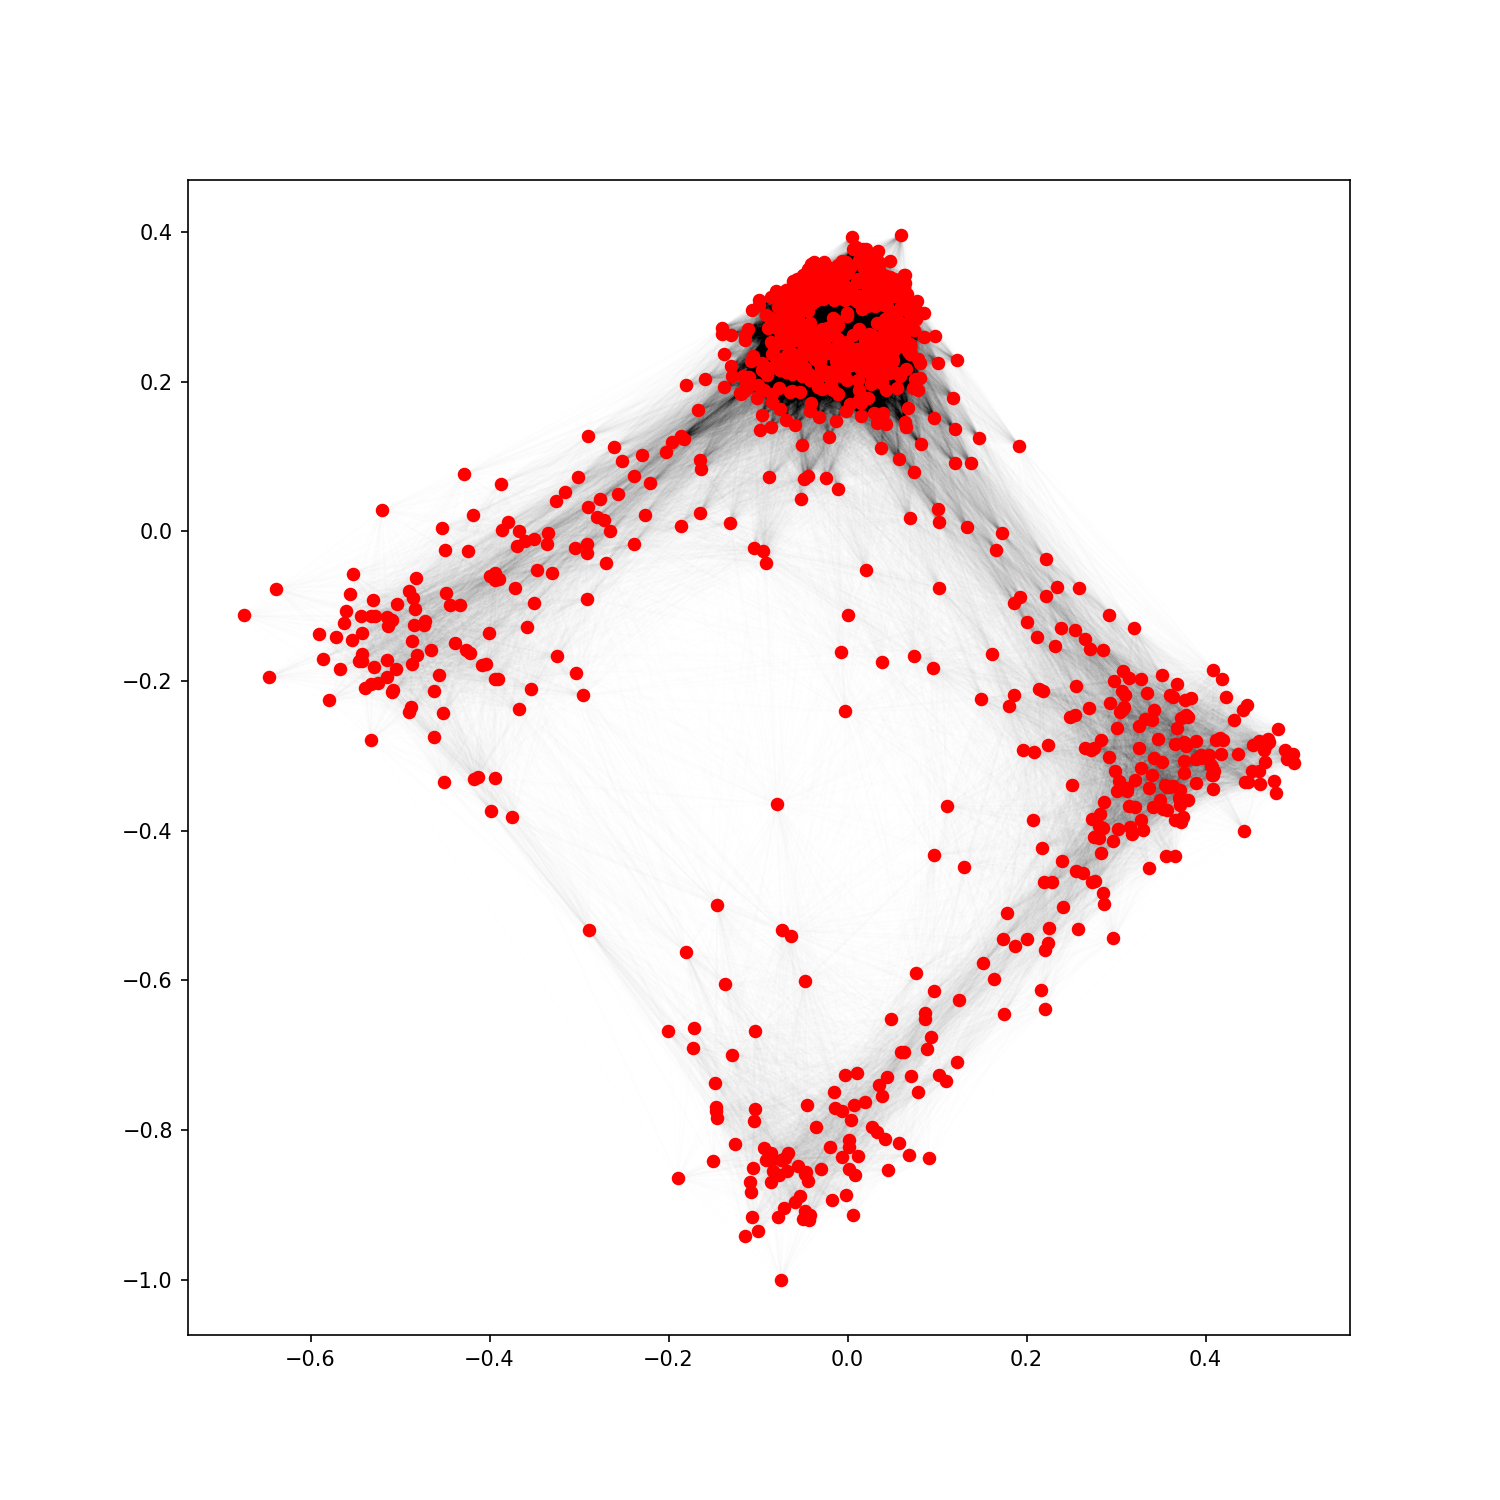

In [5]:
plt.figure(figsize = (10,10))
nx.draw_networkx_nodes(G, pos, node_size=30)
nx.draw_networkx_edges(G, pos, alpha =0.005)

## - NODE SELECTION

<IPython.core.display.Javascript object>


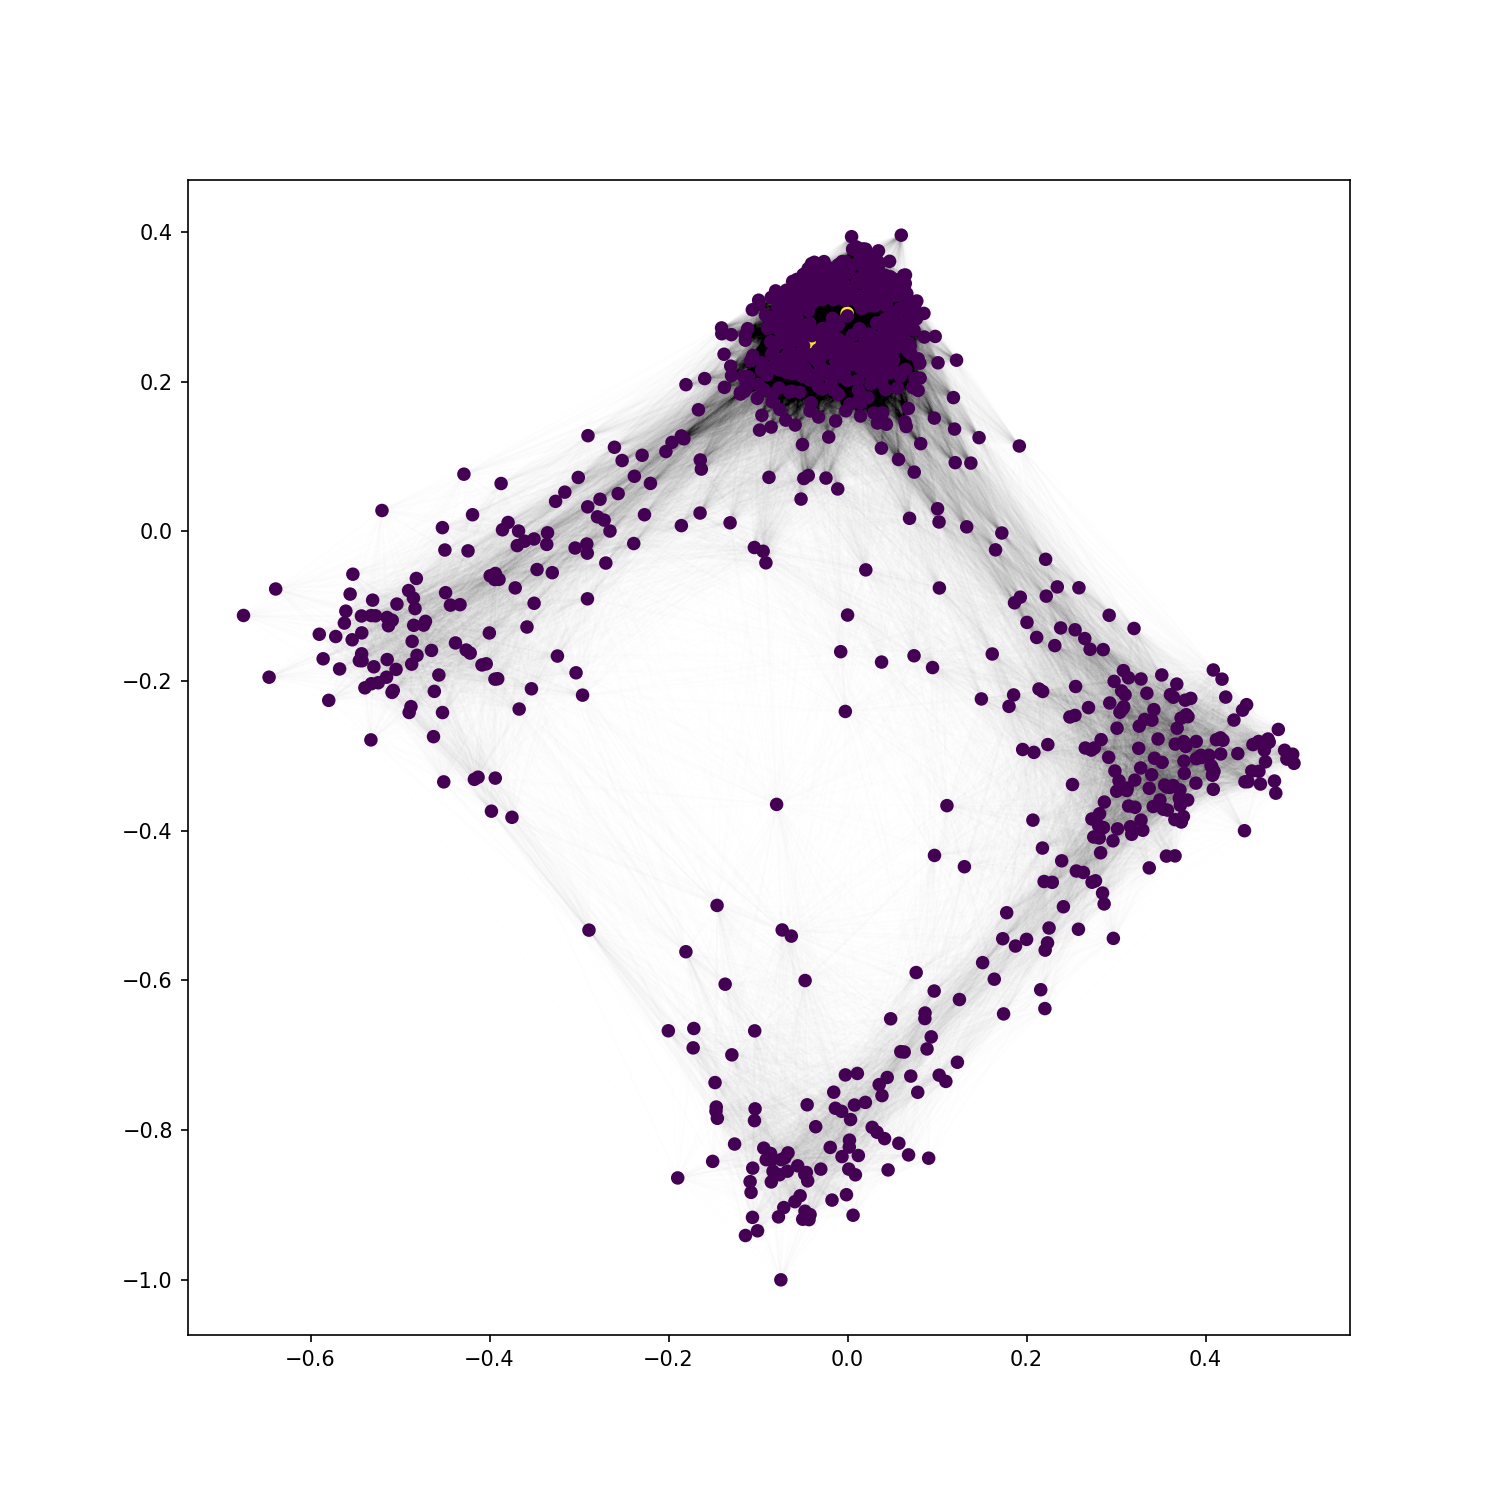

In [6]:
selected_nodes = [400, 800]
max_length = 2

color = np.ones((n_nodes))
color[selected_nodes] = 5
plt.figure(figsize = (10,10))
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=color)
nx.draw_networkx_edges(G, pos, alpha =0.005)

## - COMPUTE PATHS

In [29]:
paths = nx.all_simple_paths(G, selected_nodes[0], selected_nodes[1], max_length)
list_paths = list(paths)
list_paths

NameError: name 'selected_nodes' is not defined

## - COMPUTE SMOOTHNESS

The smoothness of a signal can be computed by the quadratic form

$$ f^\intercal L f = \| \nabla_\mathcal{G} f \|_2^2 = \sum_{i \sim j} W_{ij} (f_j - f_i)^2 $$

In [45]:
import pylab
import math

class AnnoteFinder(object):
    """callback for matplotlib to display an annotation when points are
    clicked on.  The point which is closest to the click and within
    xtol and ytol is identified.
    
    Register this function like this:
    
    scatter(xdata, ydata)
    af = AnnoteFinder(xdata, ydata, annotes)
    connect('button_press_event', af)
    """

    def __init__(self, xdata, ydata, annotes, ax=None, xtol=None, ytol=None):
        self.data = list(zip(xdata, ydata, annotes))
        if xtol is None:
            xtol = ((max(xdata) - min(xdata))/float(len(xdata)))/2
        if ytol is None:
            ytol = ((max(ydata) - min(ydata))/float(len(ydata)))/2
        self.xtol = xtol
        self.ytol = ytol
        if ax is None:
            self.ax = plt.gca()
        else:
            self.ax = ax
        self.drawnAnnotations = {}
        self.links = []

    def distance(self, x1, x2, y1, y2):
        """
        return the distance between two points
        """
        return(math.sqrt((x1 - x2)**2 + (y1 - y2)**2))

    def __call__(self, event):

        if event.inaxes:
            clickX = event.xdata
            clickY = event.ydata
            if (self.ax is None) or (self.ax is event.inaxes):
                annotes = []
                # print(event.xdata, event.ydata)
                for x, y, a in self.data:
                    # print(x, y, a)
                    if ((clickX-self.xtol < x < clickX+self.xtol) and
                            (clickY-self.ytol < y < clickY+self.ytol)):
                        annotes.append(
                            (self.distance(x, clickX, y, clickY), x, y, a))
                if annotes:
                    annotes.sort()
                    distance, x, y, annote = annotes[0]
                    self.drawAnnote(event.inaxes, x, y, annote)
                    for l in self.links:
                        l.drawSpecificAnnote(annote)

    def drawAnnote(self, ax, x, y, annote):
        """
        Draw the annotation on the plot
        """
        if (x, y) in self.drawnAnnotations:
            markers = self.drawnAnnotations[(x, y)]
            for m in markers:
                m.set_visible(not m.get_visible())
            self.ax.figure.canvas.draw_idle()
        else:
            t = ax.text(x, y, " - %s" % (annote),)
            m = ax.scatter([x], [y], marker='d', c='r', zorder=100)
            self.drawnAnnotations[(x, y)] = (t, m)
            self.ax.figure.canvas.draw_idle()

    def drawSpecificAnnote(self, annote):
        annotesToDraw = [(x, y, a) for x, y, a in self.data if a == annote]
        for x, y, a in annotesToDraw:
            self.drawAnnote(self.ax, x, y, a)

<IPython.core.display.Javascript object>


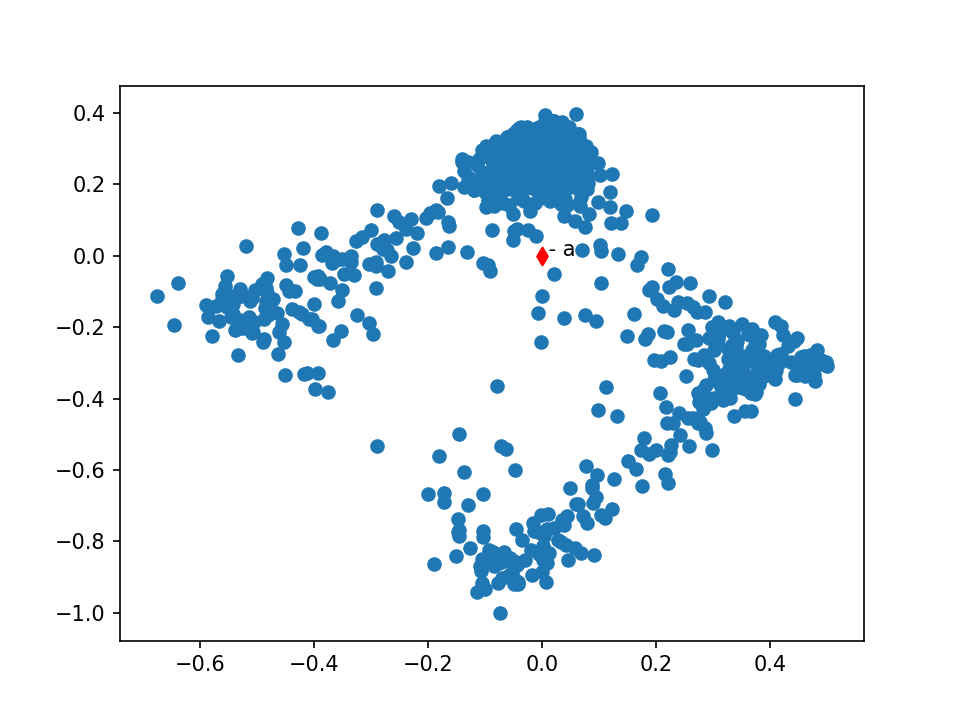

In [55]:
x = range(10)
y = range(10)
annotes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

fig, ax = plt.subplots()
ax.scatter(xypos[:, 0],xypos[:, 1])
af =  AnnoteFinder(x,y, annotes, ax=ax)
fig.canvas.mpl_connect('button_press_event', af)
plt.show()

In [42]:
import pylab
import math

class NodeSelector(object):
    """callback for matplotlib to display and save when points are
    clicked on.  The point which is closest to the click and within
    xtol and ytol is identified.
    
    Register this function like this:
    
    scatter(xdata, ydata)
    ns = NodeSelector(xdata, ydata, nbNodes)
    connect('button_press_event', ns)
    """

    def __init__(self, xdata, ydata, nbNodes, ax=None, dtol=None):
        
        self.selectedNodes = []
        markers = []
        self.counter = 0
        if dtol is None:
            dtol = ((max(xdata) - min(xdata))/float(len(xdata)))/2

        self.dtol = dtol
        if ax is None:
            self.ax = plt.gca()
        else:
            self.ax = ax

    def __call__(self, event):
        
        counter +=1
        if event.inaxes:
            
            clickX = event.xdata
            clickY = event.ydata
            if (self.ax is None) or (self.ax is event.inaxes):
                
                clickPos = np.array([clickX, clickY])             
                d = scipy.spatial.distance.cdist(xypos, clickPos).transpose()
                clickedNode = argmin(d[0])
                test = scipy.nonzero(self.selectedNodes-clickedNodes)

                if(len(test[0]) == len(self.selectedNodes) & d>self.dtol):
                    if len(self.selectedNodes) < nbNodes:
                        self.selectedNodes.append(clickedNode)
                else:
                    self.selectedNodes = self.selectedNodes(test)

                markers = self.drawSelect(event.inaxes, xdata[self.selectedNodes], ydata[self.selectedNodes], markers)
                        
                        
    def drawSelect(self, ax, x, y, markers):
        markers.remove()
        markers = ax.scatter([x], [y], marker='d', c='r', zorder=100)
        
        self.ax.figure.canvas.draw_idle()
        return markers

In [43]:
xypos = np.zeros((len(pos),2))

for i in range(0,len(pos)):
    xypos[i][0] = pos[i][0]
    xypos[i][1] = pos[i][1]

<IPython.core.display.Javascript object>


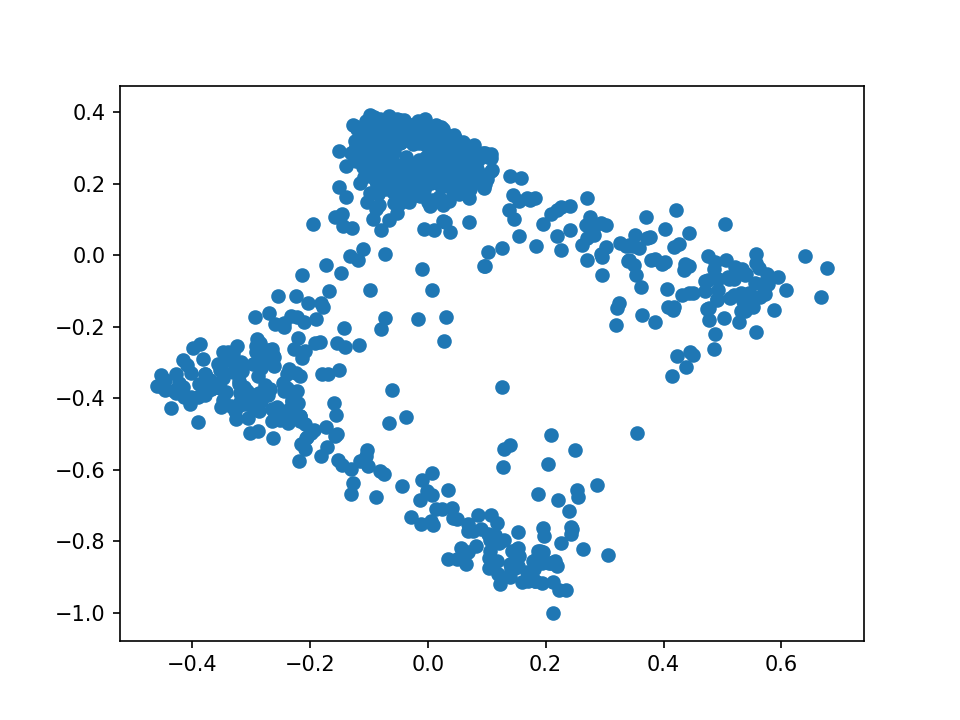

In [44]:
fig, ax = plt.subplots()
#nx.draw_networkx_nodes(G, pos, node_size=30)
ax.scatter(xypos[:, 0],xypos[:, 1])
nbNodes = 3

ns =  NodeSelector(xypos[:, 0],xypos[:, 1],nbNodes, ax=ax)
fig.canvas.mpl_connect('button_press_event', ns)
plt.show()

In [46]:
fig.canvas.mpl_disconnect(cid)
ns.selectedNodes

[]

In [80]:
class onClick(object):
    def __init__(self, nbNodes, xypos, ax=None, fig =None):
        self.counter = 0
        self.nbNodes = nbNodes
        self.data = xypos
        self.clickedNodes = []
        self.d = 0
        if ax is None:
            self.ax = plt.gca
        else:
            self.ax = ax
        if fig is None:
            self.fig = plt.gcf
        else:
            self.fig = fig
        self.x = []
        self.y = []
        
    def __call__(self, event):
        clickX = event.xdata
        clickY = event.ydata
        clickPos = np.array([clickX, clickY])
        if self.counter <= self.nbNodes:
            self.counter+=1
            self.x.append(clickX)
            self.y.append(clickY)

<IPython.core.display.Javascript object>


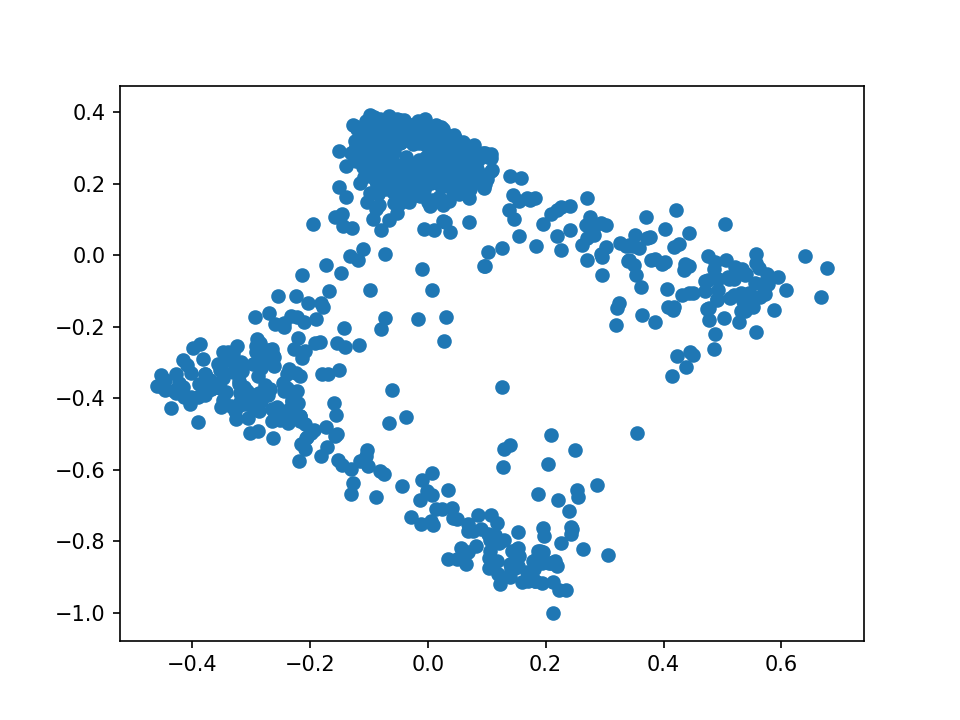

In [77]:
fig, ax = plt.subplots()
ax.scatter(xypos[:, 0],xypos[:, 1])

oc = onClick(3, xypos, ax)

cid = fig.canvas.mpl_connect('button_press_event', oc)

In [73]:
fig.canvas.mpl_disconnect(cid)

In [79]:
oc.d

0